In [2]:
# importing libraries
import pandas as pd,  numpy as np, os
working_directory = os.getcwd()


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# read data
tmqm_data = pd.read_csv(working_directory+'/tmQM_y.csv', sep=';', header=0)

# RandomForest Regression Modeling

In [15]:
# Feature Columns
features = ["Electronic_E", "Dispersion_E", "Dipole_M", "Metal_q", "HOMO_Energy", "LUMO_Energy", "Polarizability"]
x = tmqm_data[features].values

# Target Column
target = ["HL_Gap"]
y = tmqm_data[target].values

# Standardize the features (mean=0, std_dev=1)
scaler = StandardScaler()
x = scaler.fit_transform(x) 


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

RF = RandomForestRegressor(oob_score =True, random_state=42, warm_start=True, n_jobs=-1)

oob_list = list()

# iterate through all the possibilities of the number of trees
for n_trees in [50, 100, 300, 500, 1000, 2000, 5000, 10000]:
    
    # use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # fit the model
    RF.fit(X_train, y_train)
    
    # get the oob error
    oob_error = 1- RF.oob_score_
    
    # store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')    

rf_oob_df

/var/folders/3r/rhzmby3914s7l0nkcc1jk7h80000gq/T/ipykernel_3162/3322392623.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
/var/folders/3r/rhzmby3914s7l0nkcc1jk7h80000gq/T/ipykernel_3162/3322392623.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
/var/folders/3r/rhzmby3914s7l0nkcc1jk7h80000gq/T/ipykernel_3162/3322392623.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
/var/folders/3r/rhzmby3914s7l0nkcc1jk7h80000gq/T/ipykernel_3162/3322392623.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

Running Time: 17 min


,oob
n_trees,
50.0,0.000786
100.0,0.000695
300.0,0.000642
500.0,0.000633
1000.0,0.000625
2000.0,0.000619
5000.0,0.000620
10000.0,0.000615


In [7]:
import pickle

# Store the df here to save the running time 
pickle.dump(rf_oob_df, open('rf_oob_df.p', 'wb')) 

In [8]:
# Loading the df without the need to run the above code everytime
rf_oob_df = pickle.load(open('rf_oob_df.p', 'rb'))

[Text(0, 0.5, 'out-of-bag error')]

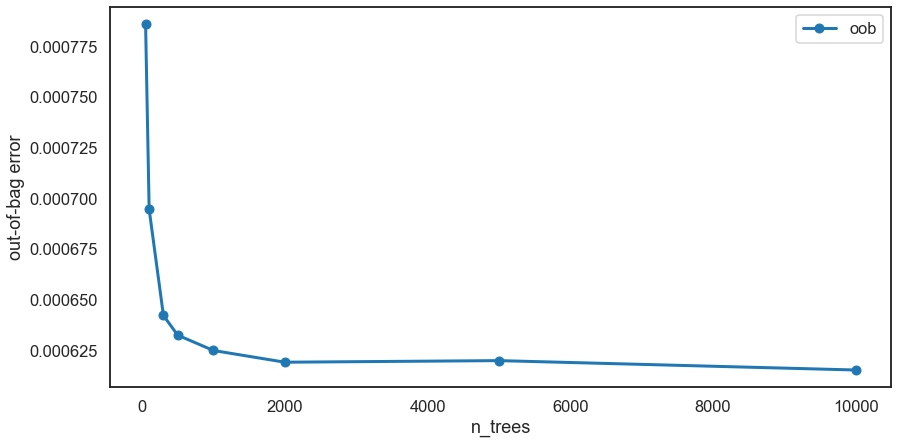

In [9]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=True, marker='o', figsize=(14,7), linewidth=3)
ax.set(ylabel='out-of-bag error')

In [18]:
# Random Forest with 2000 estimators

model = RF.set_params(n_estimators=2000)

y_pred = model.predict(X_test)


RMSE: 0.0007322797754900227


In [22]:
#Calculate MAE
mae = np.mean(abs(y_pred - y_test))
print(f'MAE: {mae}')

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calculate the R2
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')


MAE: 0.03751530872253525
MSE: 5.36233669591718e-07
RMSE: 0.0007322797754900227
R2: 0.9995288123284994


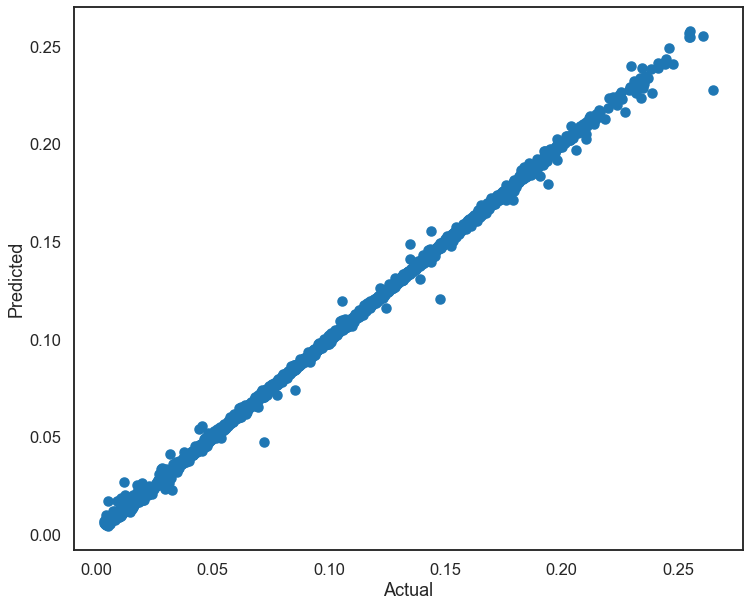

In [19]:
# visualize the results
plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RF: Actual vs Predicted')
plt.show()


Text(0, 0.5, 'Feature')

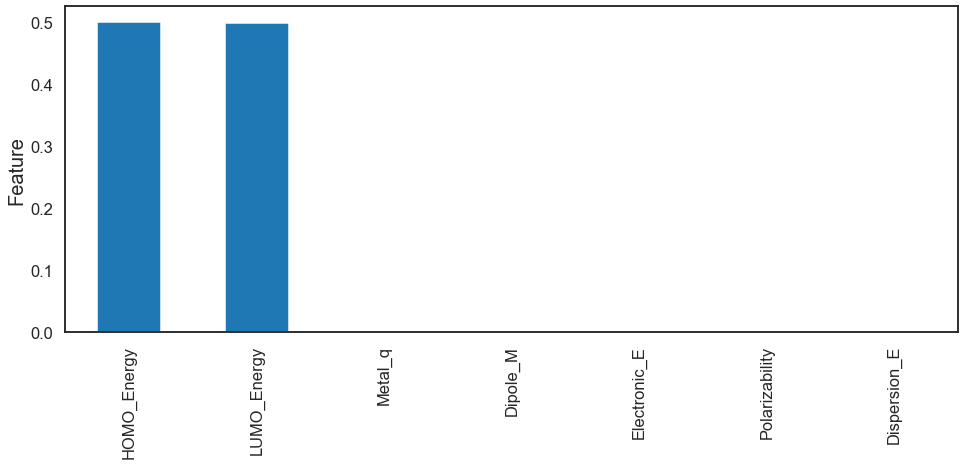

In [17]:
feature_imp = pd.Series(model.feature_importances_, index=tmqm_data[features].columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set_ylabel('Relative Importance', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)